# Practical Deep Learning for Coders - Part 1
Vishal Bakshi

This notebook contains my notes (of course videos, example notebooks and book chapters) and exercises of Part 1 of the course [Practical Deep Learning for Coders](https://course.fast.ai/).

## Lesson 1

### Notebook Exercise
The first thing I did was to run through the [lesson 1 notebook](https://www.kaggle.com/code/vishalbakshi/is-it-a-bird-creating-a-model-from-your-own-data/edit) from start to finish. In this notebook, they download training and validation images of birds and forests then train an image classifier with 100% accuracy in identifying images of birds. 

The first exercise is for us to create our own image classifier with our own image searches. I'll create a classifier which accurately predicts an image of an alligator.

I'll start by using their example code for getting images using Duck Duck Go image search:

In [7]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
!pip install -Uqq fastai duckduckgo_search

In [8]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

The `search_images` function takes a search `term` and `max_images` maximum number of images value. It prints out a line of text that it's `"Searching for"` the `term` and returns an `L` object with the `image` URL.

The `ddg_images` function returns a `list` of JSON objects containing the `title`, `image` URL, `thumbnail` URL, `height`, `width` and `source` of the image. 

In [9]:
search_object = ddg_images('alligator', max_results=1)
search_object

/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


[{'title': 'The Creature Feature: 10 Fun Facts About the American Alligator | WIRED',
  'image': 'https://www.wired.com/wp-content/uploads/2015/03/Gator-2.jpg',
  'thumbnail': 'https://tse4.mm.bing.net/th?id=OIP.FS96VErnOXAGSWU092I_DQHaE8&pid=Api',
  'url': 'https://www.wired.com/2015/03/creature-feature-10-fun-facts-american-alligator/',
  'height': 3456,
  'width': 5184,
  'source': 'Bing'}]

Wrapping this list in `L` object and calling `.itemgot('image')` on it extracts URL value associated with the `image` key in the JSON object.

In [10]:
L(search_object).itemgot('image')

(#1) ['https://www.wired.com/wp-content/uploads/2015/03/Gator-2.jpg']

Next, they provide some code to download the image to a destination filename and view the image:

Searching for 'alligator'


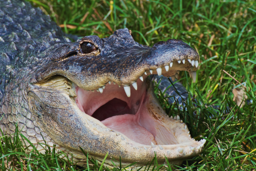

In [11]:
urls = search_images('alligator', max_images=1)

from fastdownload import download_url
dest = 'alligator.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

For my not-alligator images, I'll use images of a **swamp**.

Searching for 'swamp photos'


/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


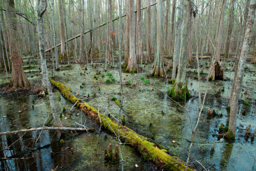

In [12]:
download_url(search_images('swamp photos', max_images=1)[0], 'swamp.jpg', show_progress=False)
Image.open('swamp.jpg').to_thumb(256,256)

In the following code, I'll search for both terms, `alligator` and `swamp` and store the images in `alligator_or_not/alligator` and `alligator_or_not/swamp` paths, respectively.

The `parents=TRUE` argument creates any intermediate parent directories that don't exist (in this case, the `alligator_or_not` directory). The `exist_ok=TRUE` argument suppresses the `FileExistsError` and does nothing.

In [13]:
searches = 'swamp','alligator'
path = Path('alligator_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'swamp photo'
Searching for 'swamp sun photo'
Searching for 'swamp shade photo'
Searching for 'alligator photo'
Searching for 'alligator sun photo'
Searching for 'alligator shade photo'


Next, I'll train my model using the code they have provided.

The `get_image_files` function is a fastai function which takes a `Path` object and returns an `L` object with paths to the image files.

In [14]:
type(get_image_files(path))

fastcore.foundation.L

In [15]:
get_image_files(path)

(#349) [Path('alligator_or_not/swamp/1b3c3a61-0f7f-4dc2-a704-38202d593207.jpg'),Path('alligator_or_not/swamp/9c9141f2-024c-4e26-b343-c1ca1672fde8.jpeg'),Path('alligator_or_not/swamp/1340dd85-5d98-428e-a861-d522c786c3d7.jpg'),Path('alligator_or_not/swamp/2d3f91dc-cc5f-499b-bec6-7fa0e938fb13.jpg'),Path('alligator_or_not/swamp/84afd585-ce46-4016-9a09-bd861a5615db.jpg'),Path('alligator_or_not/swamp/6222f0b6-1f5f-43ec-b561-8e5763a91c61.jpg'),Path('alligator_or_not/swamp/a71c8dcb-7bbb-4dba-8ae6-8a780d5c27c6.jpg'),Path('alligator_or_not/swamp/bbd1a832-a901-4e8f-8724-feac35fa8dcb.jpg'),Path('alligator_or_not/swamp/45b358b3-1a12-41d4-8972-8fa98b2baa52.jpg'),Path('alligator_or_not/swamp/cf664509-8eb6-42c8-9177-c17f48bc026b.jpg')...]

The fastai `parent_label` function takes a `Path` object and returns a string of the file's parent folder name.

In [16]:
parent_label(Path('alligator_or_not/swamp/18b55d4f-3d3b-4013-822b-724489a23f01.jpg'))

'swamp'

Some image files that are downloaded may be corrupted, so they have provided a `verify_images` function to find images that can't be opened. Those images are then removed (`unlink`ed) from the path.

In [18]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

In [19]:
failed

(#1) [Path('alligator_or_not/alligator/1eb55508-274b-4e23-a6ae-dbbf1943a9d1.jpg')]

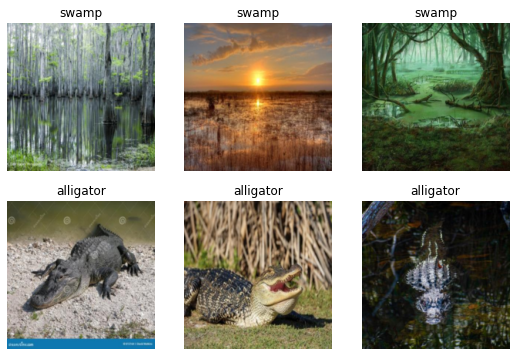

In [20]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

I'll train the model using their code which uses the `resnet18` image classification model, and `fine_tune`s it for 3 epochs.

In [21]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.690250,0.171598,0.043478,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.127188,0.001747,0.000000,00:02
1,0.067970,0.006409,0.000000,00:02
2,0.056453,0.004981,0.000000,00:02


The accuracy is 100%.

Next, I'll test the model as they've done in the lesson.

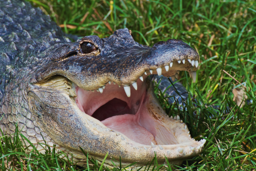

In [22]:
PILImage.create('alligator.jpg').to_thumb(256,256)

In [24]:
is_alligator,_,probs = learn.predict(PILImage.create('alligator.jpg'))
print(f"This is an: {is_alligator}.")
print(f"Probability it's an alligator: {probs[0]:.4f}")

This is an: alligator.
Probability it's an alligator: 1.0000


### Video Notes
In this section, I'll take notes while I watch the lesson 1 video.

### Book Notes
In this section, I'll take notes while I read Chapter 1 in the textbook.